# Pune Housing price prediction

In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv(r'E:\house_price_prediction-main\house_price_prediction-main\dataset\Pune house data.csv')

In [67]:
df.shape

(13320, 9)

In [68]:
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [69]:
df.tail()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.0,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.0,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.0,Prabhat Road
13319,Super built-up Area,Ready To Move,1 BHK,NaN,550,1.0,1.0,17.0,Pune Railway Station


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [71]:
df['total_sqft']=pd.to_numeric(df['total_sqft'],errors='coerce')

In [72]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [73]:
df['availability'].value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [74]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [75]:
df['society'].value_counts()

society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: count, Length: 2688, dtype: int64

In [76]:
df['site_location'].value_counts()

site_location
Alandi Road            139
Kalyani Nagar          139
Mahatma Gandhi Road    139
Lulla Nagar            139
Laxmi Road             139
                      ... 
Sadashiv Peth          138
Raviwar Peth           138
Rasta Peth             138
Ghorpadi               138
other                    1
Name: count, Length: 97, dtype: int64

In [77]:
df.isna().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft        247
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [78]:
df.describe()

,total_sqft,bath,balcony,price
count,13073.000000,13247.000000,12711.000000,13320.000000
mean,1554.942029,2.692610,1.584376,112.565627
std,1238.458773,1.341458,0.817263,148.971674
min,1.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,50.000000
50%,1275.000000,2.000000,2.000000,72.000000
75%,1670.000000,3.000000,2.000000,120.000000
max,52272.000000,40.000000,3.000000,3600.000000


# EDA

In [79]:
# a new column that sum up all the number of the rooms in the instance
df['all_no_of_rooms'] =int(df['size'].str.split()[0][0]) + df['bath'] + df['balcony']

In [80]:
num_cols = df.select_dtypes(include=np.number).columns

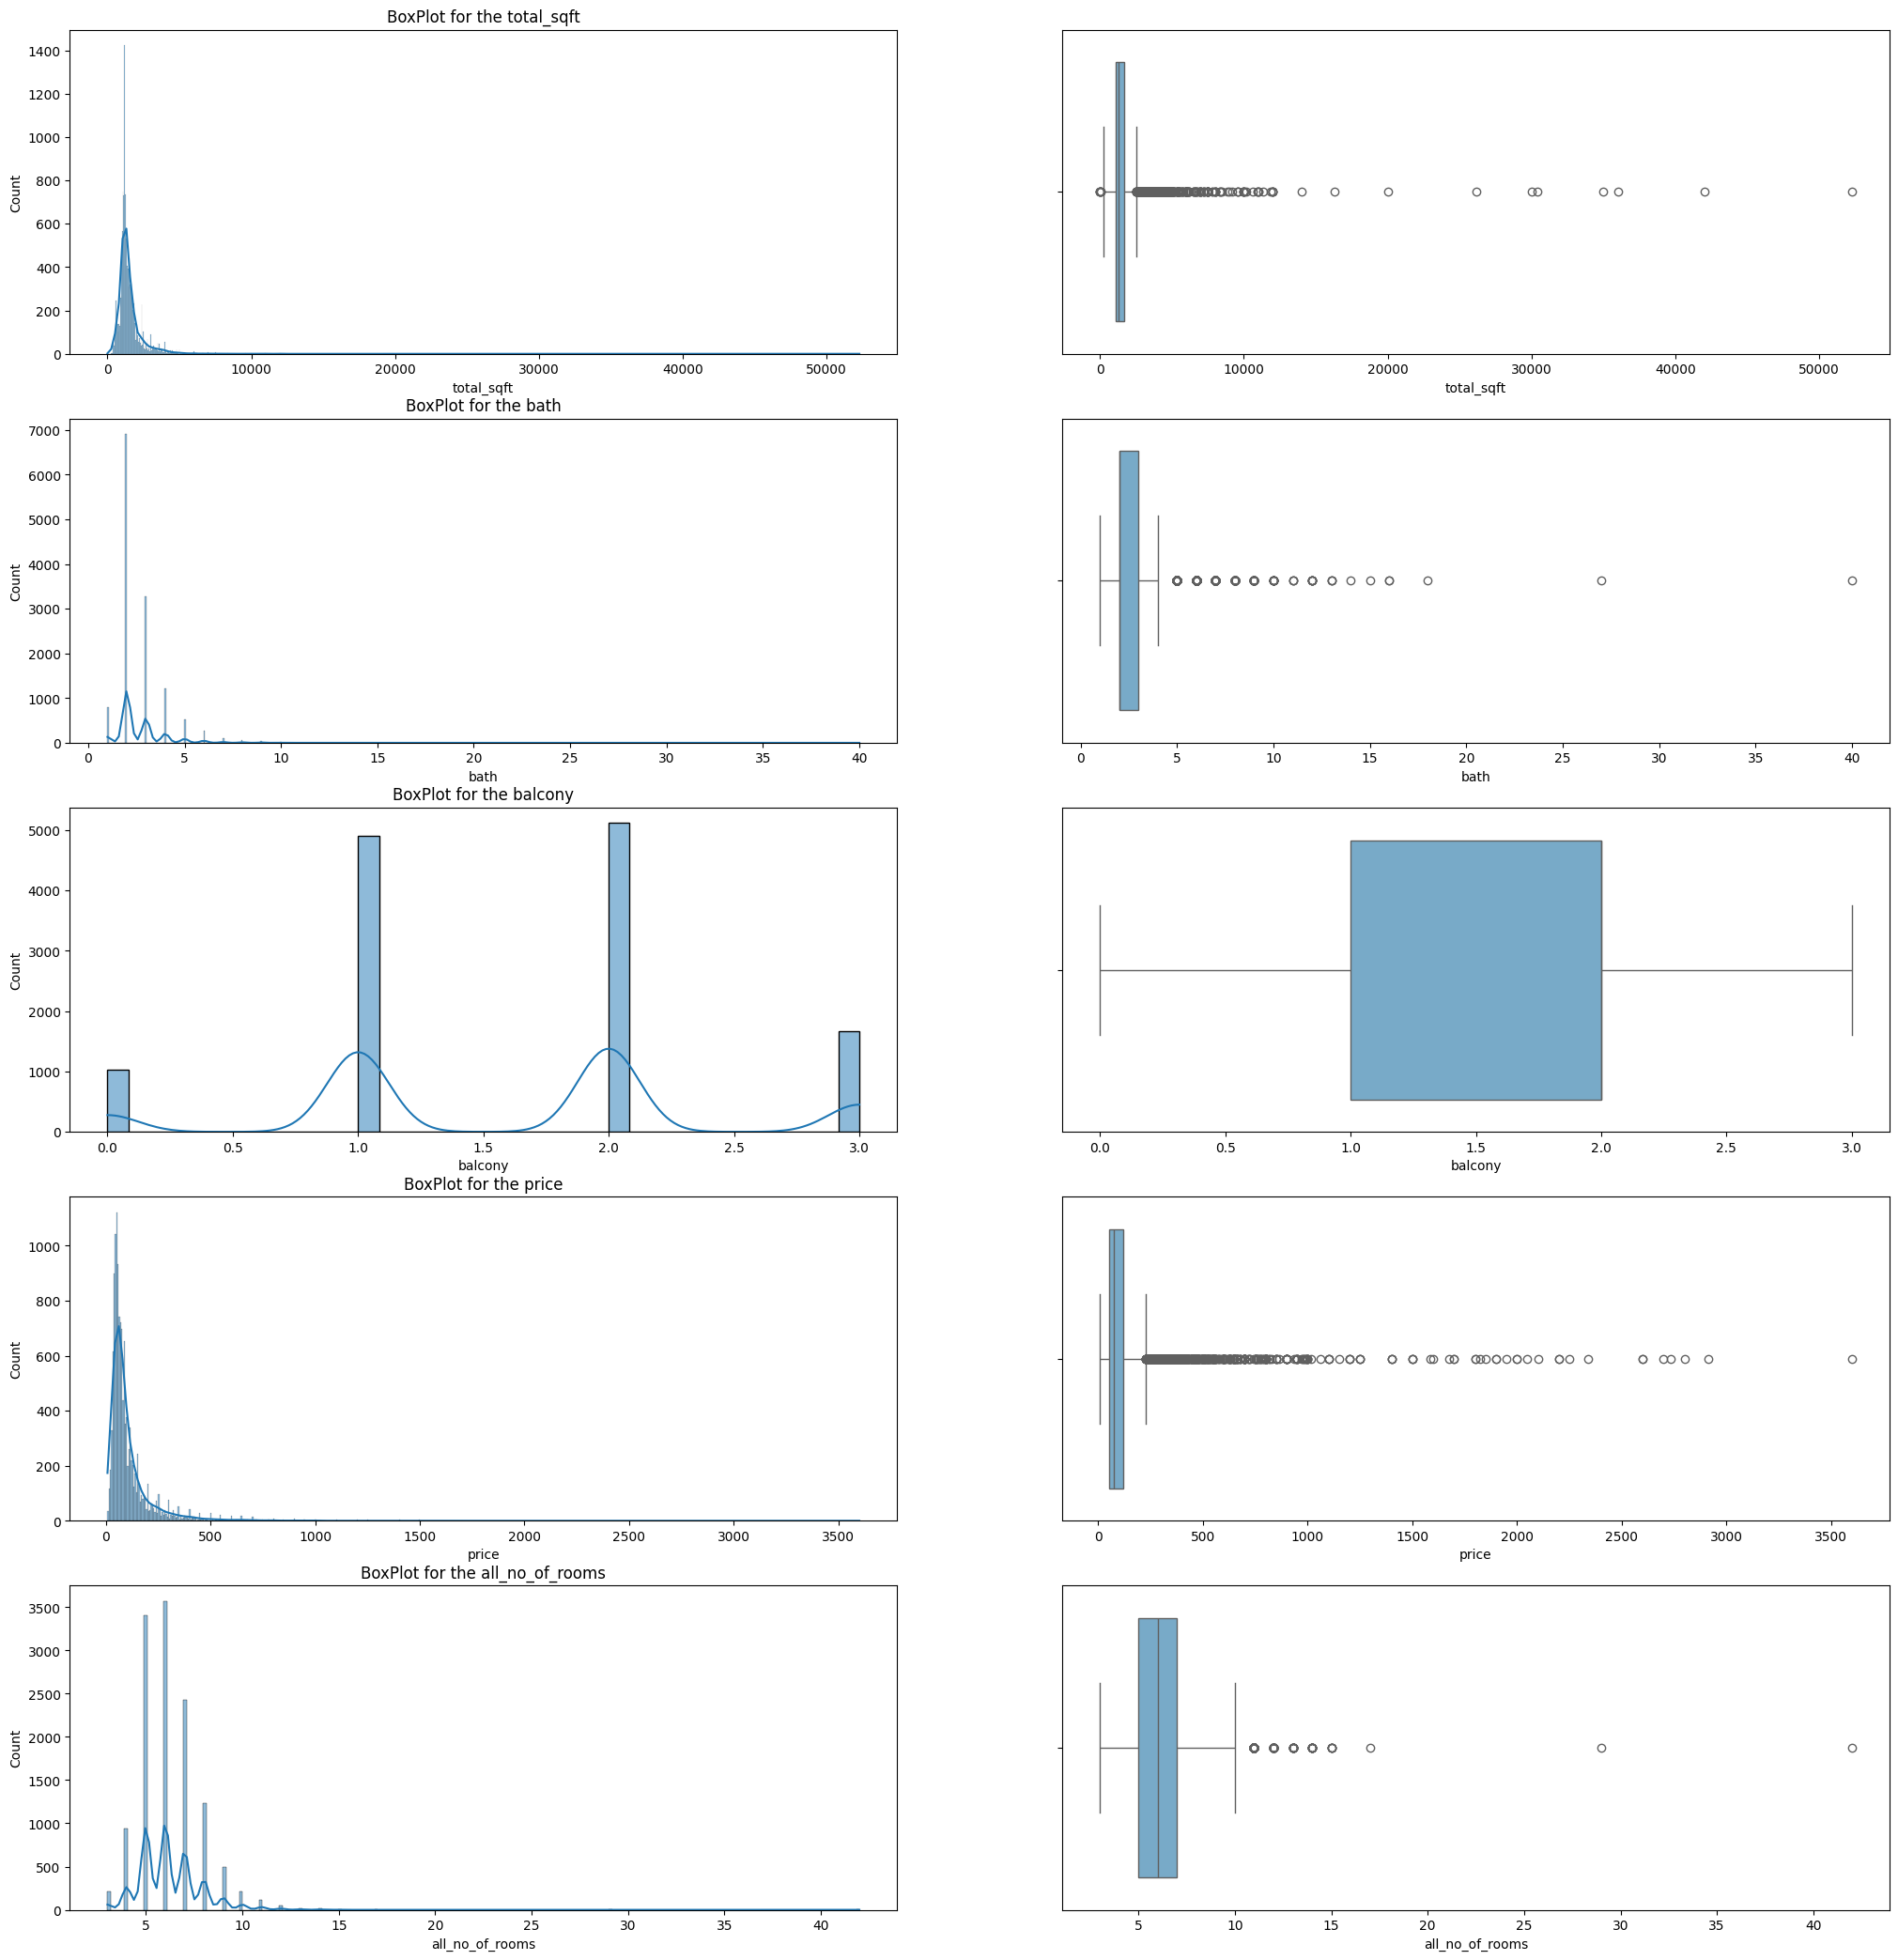

In [81]:
fig,ax = plt.subplots(5,2, figsize=(25,26))
for i,col in enumerate(df[num_cols].columns):

    sns.histplot(data=df , x = col, ax = ax[i,0],kde=True ,palette='Blues')
    ax[i,0].set_title(f'Histogram with KDE for the {col}')

    sns.boxplot(data=df,x = col,ax= ax[i,1],palette='Blues')
    ax[i,0].set_title(f'BoxPlot for the {col}')
plt.show()

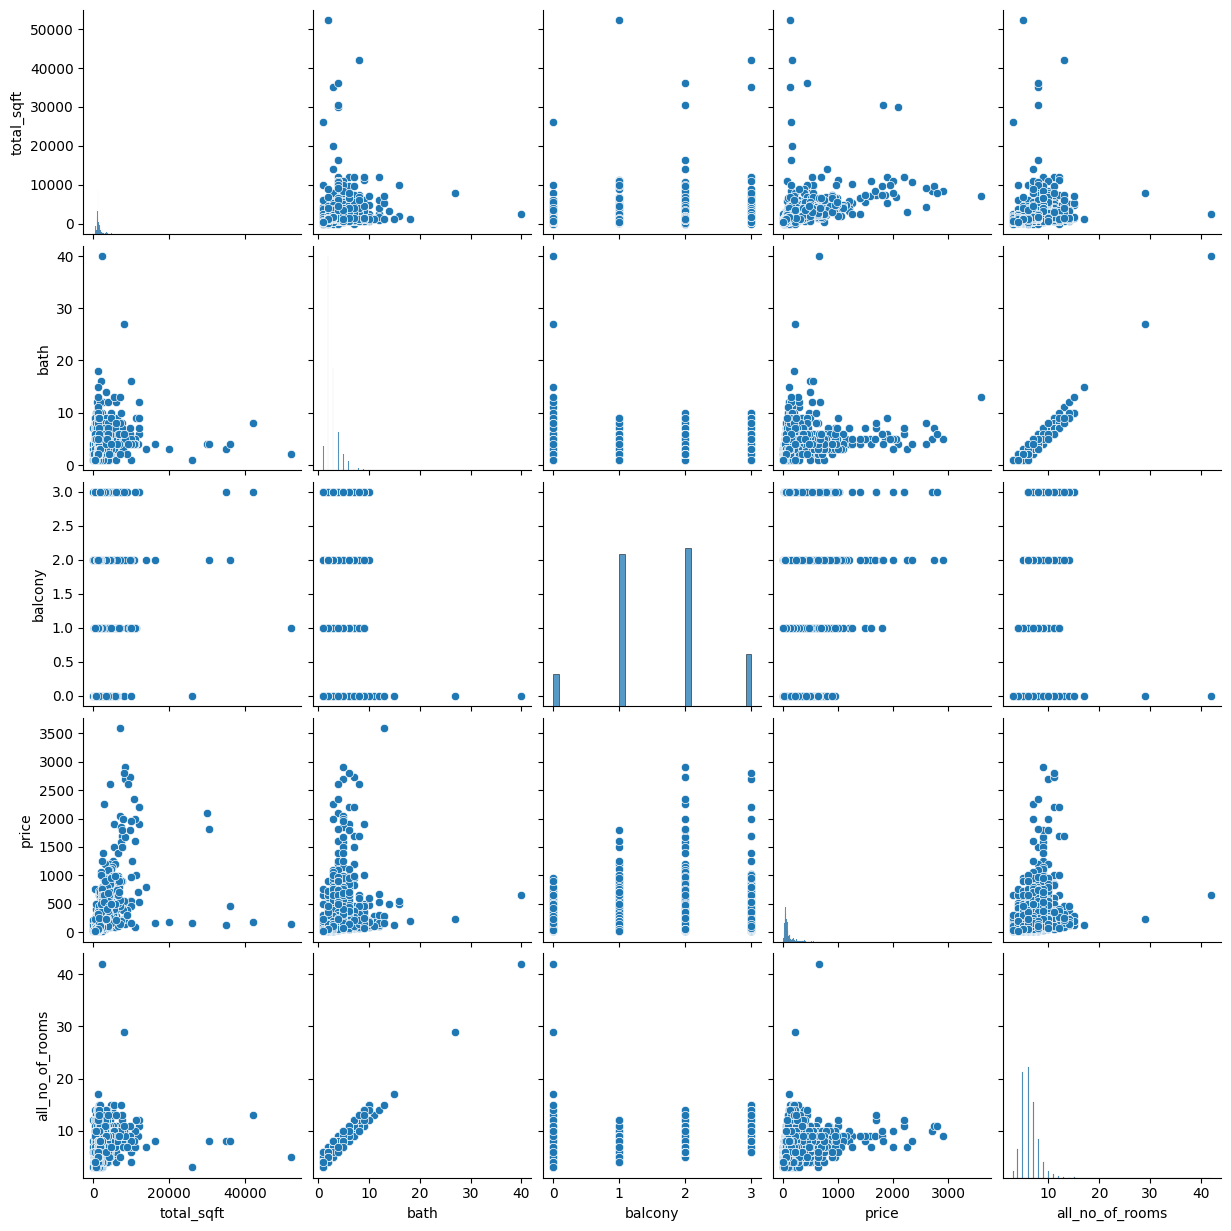

In [82]:
sns.pairplot(data=df)
plt.show()

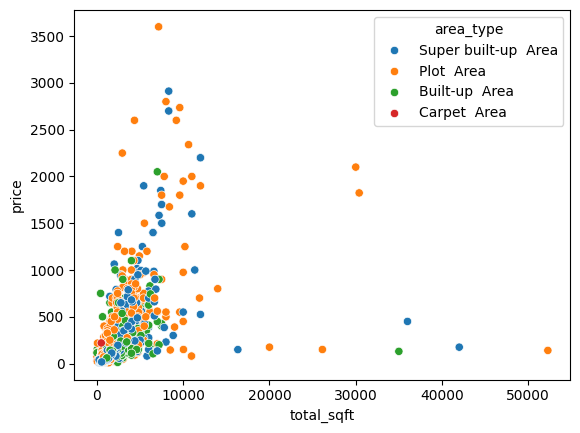

In [83]:
sns.scatterplot(data=df, x = 'total_sqft',y = 'price',hue = 'area_type')
plt.show()

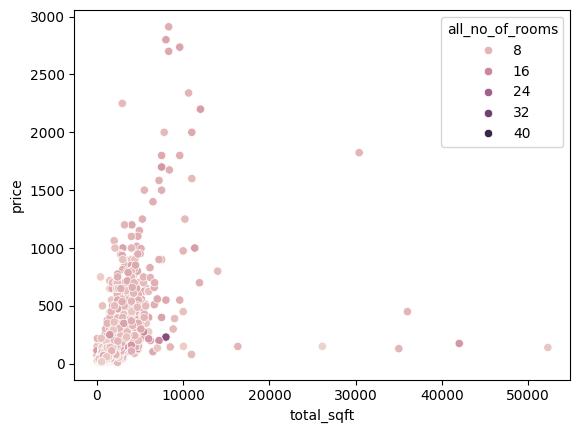

In [84]:
sns.scatterplot(data=df, x = 'total_sqft',y = 'price',hue = 'all_no_of_rooms')
plt.show()

In [85]:
num_cols = df.select_dtypes(include=np.number).columns

In [86]:
old_skew = df[num_cols].skew().sort_values(ascending=True)
old_skew

balcony             0.005857
all_no_of_rooms     2.018041
bath                4.227697
price               8.064469
total_sqft         15.484335
dtype: float64

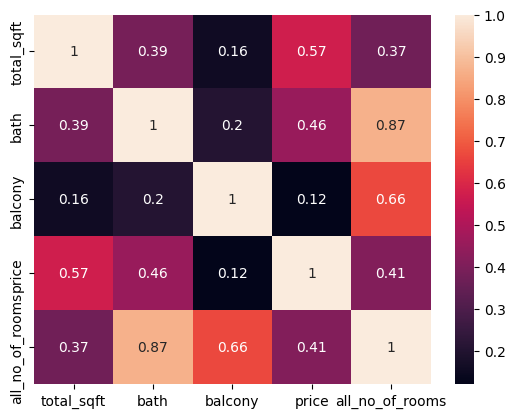

In [87]:
cm = df[num_cols].corr()
sns.heatmap(cm,annot= True)
plt.show()

# Cleaning and PreProcessing

In [88]:
df.isna().sum()

area_type             0
availability          0
size                 16
society            5502
total_sqft          247
bath                 73
balcony             609
price                 0
site_location         1
all_no_of_rooms     609
dtype: int64

In [89]:
cat_cols = df.select_dtypes(include= object).columns

In [90]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy='median')
cat_imp = SimpleImputer(strategy='most_frequent')
df[num_cols] = num_imp.fit_transform(df[num_cols])
df[cat_cols]  = cat_imp.fit_transform(df[cat_cols])

In [91]:
df.isna().sum()

area_type          0
availability       0
size               0
society            0
total_sqft         0
bath               0
balcony            0
price              0
site_location      0
all_no_of_rooms    0
dtype: int64

In [92]:
filt = df['availability'] == 'Ready To Move'

df.loc[~filt , 'availability'] = 'Under Construction'

In [93]:
old_skew

balcony             0.005857
all_no_of_rooms     2.018041
bath                4.227697
price               8.064469
total_sqft         15.484335
dtype: float64

In [94]:
df['size'].value_counts()

size
2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [95]:
df['bath'].value_counts()

bath
2.0     6981
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [96]:
df

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location,all_no_of_rooms
0,Super built-up Area,Under Construction,2 BHK,Coomee,1056.0,2.0,1.0,39.07,Alandi Road,5.0
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,Ambegaon Budruk,10.0
2,Built-up Area,Ready To Move,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,Anandnagar,7.0
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,Aundh,6.0
4,Super built-up Area,Ready To Move,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,Aundh Road,5.0
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,Pashan,6.0
13316,Super built-up Area,Ready To Move,4 BHK,GrrvaGr,3600.0,5.0,2.0,400.00,Paud Road,6.0
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,Pirangut,5.0
13318,Super built-up Area,Under Construction,4 BHK,SollyCl,4689.0,4.0,1.0,488.00,Prabhat Road,7.0


In [97]:
df['size'] = df['size'].apply(lambda x : int(x.split()[0][0]))

In [98]:

df= df.drop(columns = ['size','bath','balcony'])

In [99]:
num_cols = df.select_dtypes(include=np.number).columns
new_skew = df[num_cols].skew().sort_values(ascending=True)
new_skew

all_no_of_rooms     2.081108
price               8.064469
total_sqft         15.620177
dtype: float64

In [100]:
right_skewed = ['total_sqft','all_no_of_rooms']

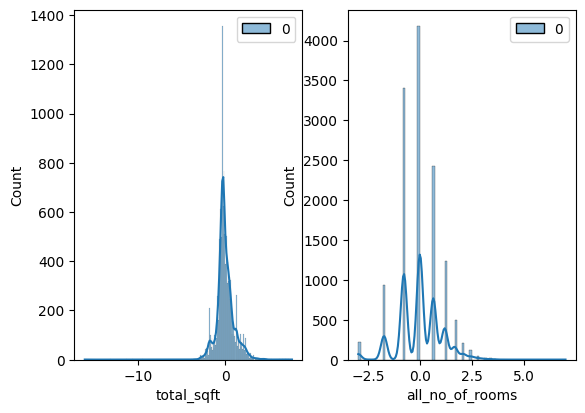

In [101]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, QuantileTransformer



Yeo_Johnson = []
fig = plt.figure(figsize=(10,10))
c = 1
for col in right_skewed:
    yeojohnson = PowerTransformer(standardize=True)
    df_yeojohnson = pd.DataFrame(yeojohnson.fit_transform(df[col].values.reshape(-1,1)))
    plt.subplot(2,3,c)
    g = sns.histplot(df_yeojohnson, kde=True)
    g.set(xlabel = col)
    c = c + 1
    Yeo_Johnson.append(round(df_yeojohnson.skew()[0],2))

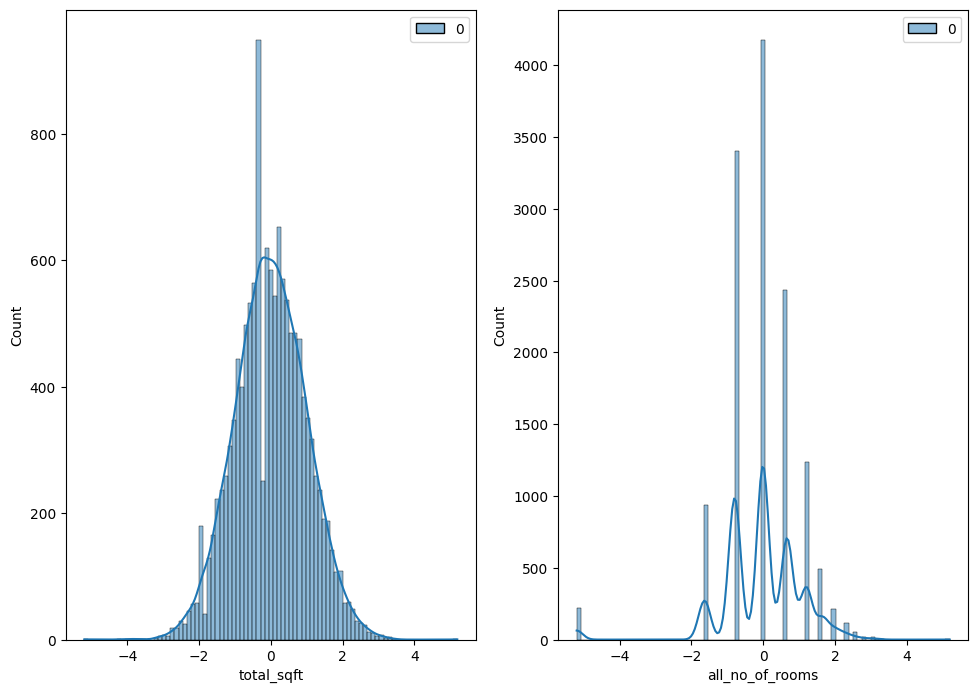

In [102]:
Quantile_Transformer = []
fig = plt.figure(figsize=(18,18))
c = 1
for col in right_skewed:
    QuantileTr = QuantileTransformer(output_distribution='normal')
    df_quantile = pd.DataFrame(QuantileTr.fit_transform(df[col].values.reshape(-1,1)))
    plt.subplot(2,3,c)
    g = sns.histplot(df_quantile, kde=True)
    g.set(xlabel = col)
    c = c + 1
    Quantile_Transformer.append(round(df_quantile.skew()[0],2))

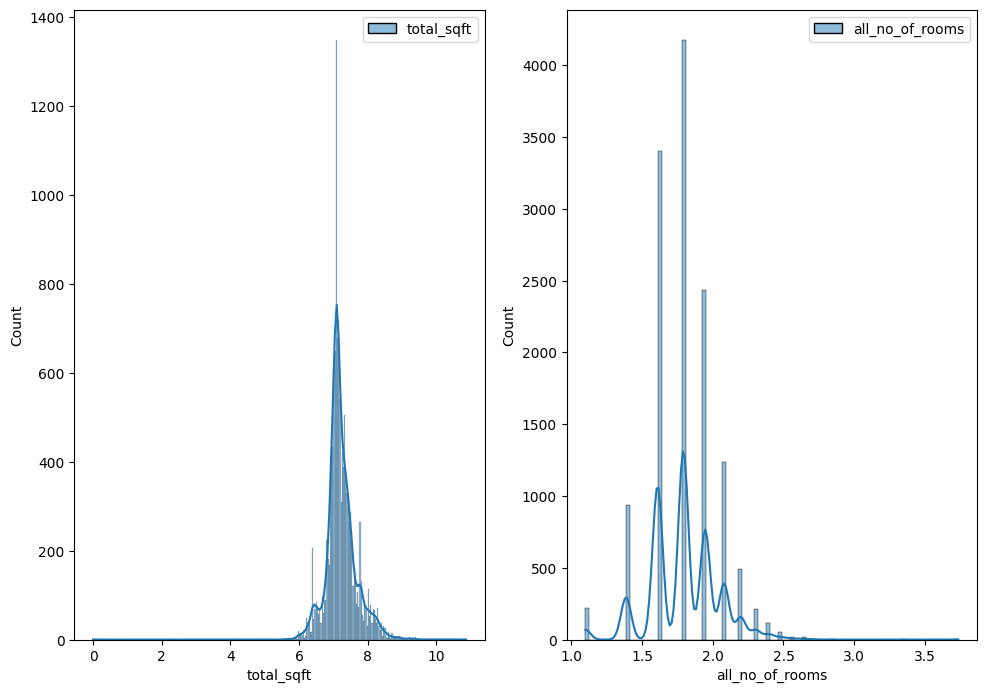

In [103]:
log_Transformer = []
fig = plt.figure(figsize=(18,18))
c = 1
for col in right_skewed:

    df_log = pd.DataFrame(df[col].apply(lambda x : np.log(x)))
    plt.subplot(2,3,c)
    g = sns.histplot(df_log, kde=True)
    g.set(xlabel = col)
    c = c + 1
    log_Transformer.append(round(df_log.skew()[0],2))

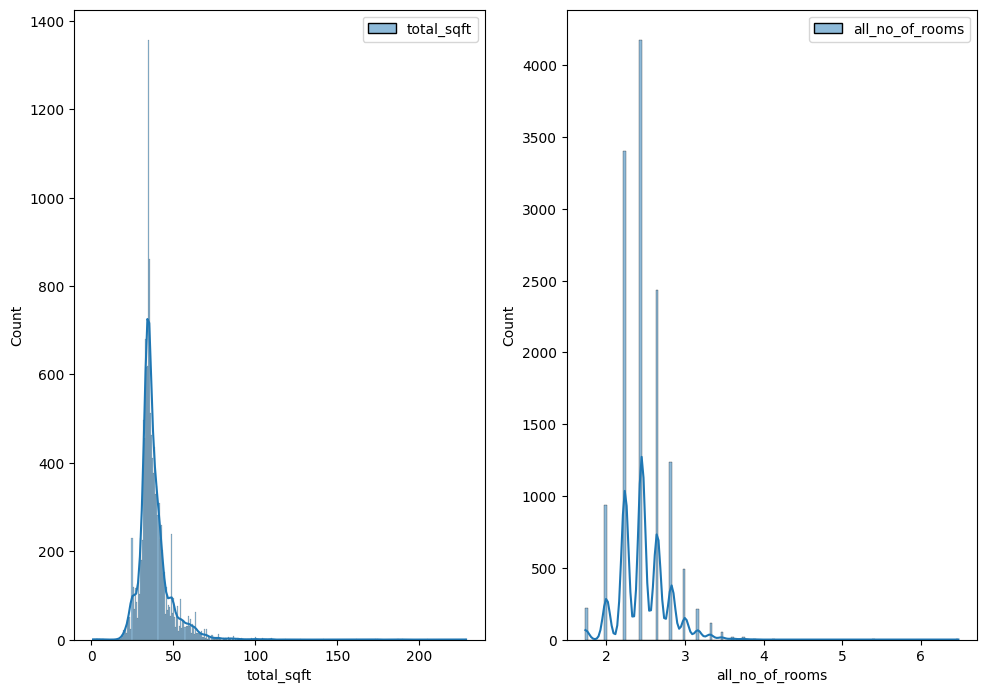

In [104]:
sqrt_Transformer = []
fig = plt.figure(figsize=(18,18))
c = 1
for col in right_skewed:

    df_sqrt = pd.DataFrame(df[col].apply(lambda x : np.sqrt(x)))
    plt.subplot(2,3,c)
    g = sns.histplot(df_sqrt, kde=True)
    g.set(xlabel = col)
    c = c + 1
    sqrt_Transformer.append(round(df_sqrt.skew()[0],2))

In [105]:
dict={"Yeo_Johnson":Yeo_Johnson, "Quantile_Transformer":Quantile_Transformer,"Log_Transformer":log_Transformer,"Sqrt_Transformer":sqrt_Transformer}
pd.DataFrame(dict, index=right_skewed)

,Yeo_Johnson,Quantile_Transformer,Log_Transformer,Sqrt_Transformer
total_sqft,-0.06,0.00,0.12,3.65
all_no_of_rooms,-0.02,-1.27,0.09,0.75


In [106]:
X = df.drop(columns= ['price'])
y = df['price']

In [107]:
X= X.drop(columns= ['society','site_location'])

In [108]:
from sklearn.model_selection import train_test_split 

X_train, X_test , y_train , y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [109]:
cat_cols = X_train.select_dtypes(include= object).columns
num_cols = X_train.select_dtypes(include= np.number).columns

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
power = PowerTransformer(method='yeo-johnson',standardize=True)
cat_pipeline = Pipeline([('onehotencoder',OneHotEncoder())])
num_pipeline = Pipeline([('scale',StandardScaler()),('power',power)])

pipeline2 = ColumnTransformer(
    [('cat',cat_pipeline,cat_cols),
    ('num',num_pipeline,num_cols)
    ]
)

In [111]:
X_train_ready = pipeline2.fit_transform(X_train)
X_test_ready = pipeline2.transform(X_test)

# Model Training

In [112]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,ElasticNet,Lasso
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
import time
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_predict

In [113]:
model_name= []
rmse = []
R2 = []
training_time = []

models = [
    DummyRegressor(),
    LinearRegression(),
    SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, random_state=42),
    Ridge(alpha=0.1, solver="cholesky",fit_intercept=False,random_state=42),
    ElasticNet(alpha=0.1, l1_ratio=0.5,random_state=42),
    Lasso(alpha=0.1,random_state=42),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    LinearSVR(epsilon=0.5,random_state=42),
    SVR(kernel='rbf',gamma=1,C=1,epsilon=0.1)
]

for model in models :
    
    start_time = time.time()
    model.fit(X_train_ready , y_train)
    fitting_time = time.time() - start_time
    
    prediction =cross_val_predict(model, X_train_ready,y_train,cv = 3 )
    model_name.append(model.__class__.__name__)
    rmse.append(str((mean_squared_error(y_train, prediction, squared=False))))
    R2.append(str(r2_score(y_train, prediction)))
    training_time.append(fitting_time)

In [114]:
models_df = pd.DataFrame({'model_name':model_name,'rmse':rmse,'R2':R2,'training_time':training_time})

models_df = models_df.set_index('model_name')
models_df.sort_values('rmse')

,rmse,R2,training_time
model_name,,,
RandomForestRegressor,104.0337416352185,0.5171586215953032,2.164557
LinearRegression,122.01326298585617,0.33584395883945584,0.264557
Ridge,122.01358001282183,0.33584050748272887,0.235751
Lasso,122.01631322235554,0.3358107516573746,0.202051
SGDRegressor,122.12491473013752,0.3346278925346544,0.137630
ElasticNet,122.35242689481755,0.33214647823089827,0.099410
LinearSVR,130.11502341674543,0.2447148730805604,0.152799
DecisionTreeRegressor,130.7946364775204,0.23680430050334855,0.022382
SVR,135.28946653321398,0.18344768802470757,7.487575


In [115]:
rf_reg = RandomForestRegressor()


In [116]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
n_estimators = [10,100,1000]
max_features = ['sqrt', 'log2']

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features
}
cv = RepeatedKFold(n_splits=10,n_repeats=3 ,  random_state= 42)
grid_search = GridSearchCV(estimator=rf_reg, param_grid= param_grid , n_jobs=-1, cv=cv , scoring="neg_root_mean_squared_error",error_score=0)
grid_result= grid_search.fit(X_train_ready,y_train)

In [117]:
print("Best: %f using %s" % (-1*grid_result.best_score_, grid_result.best_params_))

Best: 105.163268 using {'max_features': 'log2', 'n_estimators': 1000}


In [118]:
mean_squared_error(y_test, grid_search.predict(X_test_ready), squared=False),r2_score(y_test,grid_search.predict(X_test_ready))


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



(93.23333372907935, 0.591722178474416)

# Save the Model Using Pickle

In [119]:
df.to_csv("cleaned_house_data.csv")


In [123]:
import pickle
# Save the model
with open('pune_house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)
